In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge

### Data Exploration

#### Import Dataset

In [2]:
data_aep = pd.read_csv('data/AEP_hourly.csv', parse_dates=['Datetime'])
data_aep = data_aep.sort_values(by='Datetime')
# check for NA values
print(data_aep.isna().sum())
display(data_aep)

Datetime    0
AEP_MW      0
dtype: int64


,Datetime,AEP_MW
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0
...,...,...
116157,2018-08-02 20:00:00,17673.0
116158,2018-08-02 21:00:00,17303.0
116159,2018-08-02 22:00:00,17001.0
116160,2018-08-02 23:00:00,15964.0


#### Extend Dataset with more Specific Columns

In [3]:
data_aep['date'] = data_aep['Datetime'].dt.date
data_aep['year'] = data_aep['Datetime'].dt.year
data_aep['month'] = data_aep['Datetime'].dt.month
data_aep['hour'] = data_aep['Datetime'].dt.hour
data_aep.head()

,Datetime,AEP_MW,date,year,month,hour
2183,2004-10-01 01:00:00,12379.0,2004-10-01,2004,10,1
2184,2004-10-01 02:00:00,11935.0,2004-10-01,2004,10,2
2185,2004-10-01 03:00:00,11692.0,2004-10-01,2004,10,3
2186,2004-10-01 04:00:00,11597.0,2004-10-01,2004,10,4
2187,2004-10-01 05:00:00,11681.0,2004-10-01,2004,10,5


#### Add Seasonal Columns 

In [4]:
# Define Seasons
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
spring = [3, 4, 5]
summer = [6, 7, 8]
fall = [9, 10, 11]
winter = [12, 1, 2]

# Add Season Column
data_aep['season'] = data_aep['Datetime'].apply(lambda x: 'Winter' if x.month in winter else 'Spring' if x.month in spring else 'Summer' if x.month in summer else 'Fall' if x.month in fall else '')

# Add Season Columns
data_aep['spring'] = data_aep['Datetime'].apply(lambda x: 1 if x.month in spring else 0)
data_aep['summer'] = data_aep['Datetime'].apply(lambda x: 1 if x.month in summer else 0)
data_aep['fall'] = data_aep['Datetime'].apply(lambda x: 1 if x.month in fall else 0)
data_aep['winter'] = data_aep['Datetime'].apply(lambda x: 1 if x.month in winter else 0)

display(data_aep)

,Datetime,AEP_MW,date,year,month,hour,season,spring,summer,fall,winter
2183,2004-10-01 01:00:00,12379.0,2004-10-01,2004,10,1,Fall,0,0,1,0
2184,2004-10-01 02:00:00,11935.0,2004-10-01,2004,10,2,Fall,0,0,1,0
2185,2004-10-01 03:00:00,11692.0,2004-10-01,2004,10,3,Fall,0,0,1,0
2186,2004-10-01 04:00:00,11597.0,2004-10-01,2004,10,4,Fall,0,0,1,0
2187,2004-10-01 05:00:00,11681.0,2004-10-01,2004,10,5,Fall,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
116157,2018-08-02 20:00:00,17673.0,2018-08-02,2018,8,20,Summer,0,1,0,0
116158,2018-08-02 21:00:00,17303.0,2018-08-02,2018,8,21,Summer,0,1,0,0
116159,2018-08-02 22:00:00,17001.0,2018-08-02,2018,8,22,Summer,0,1,0,0
116160,2018-08-02 23:00:00,15964.0,2018-08-02,2018,8,23,Summer,0,1,0,0


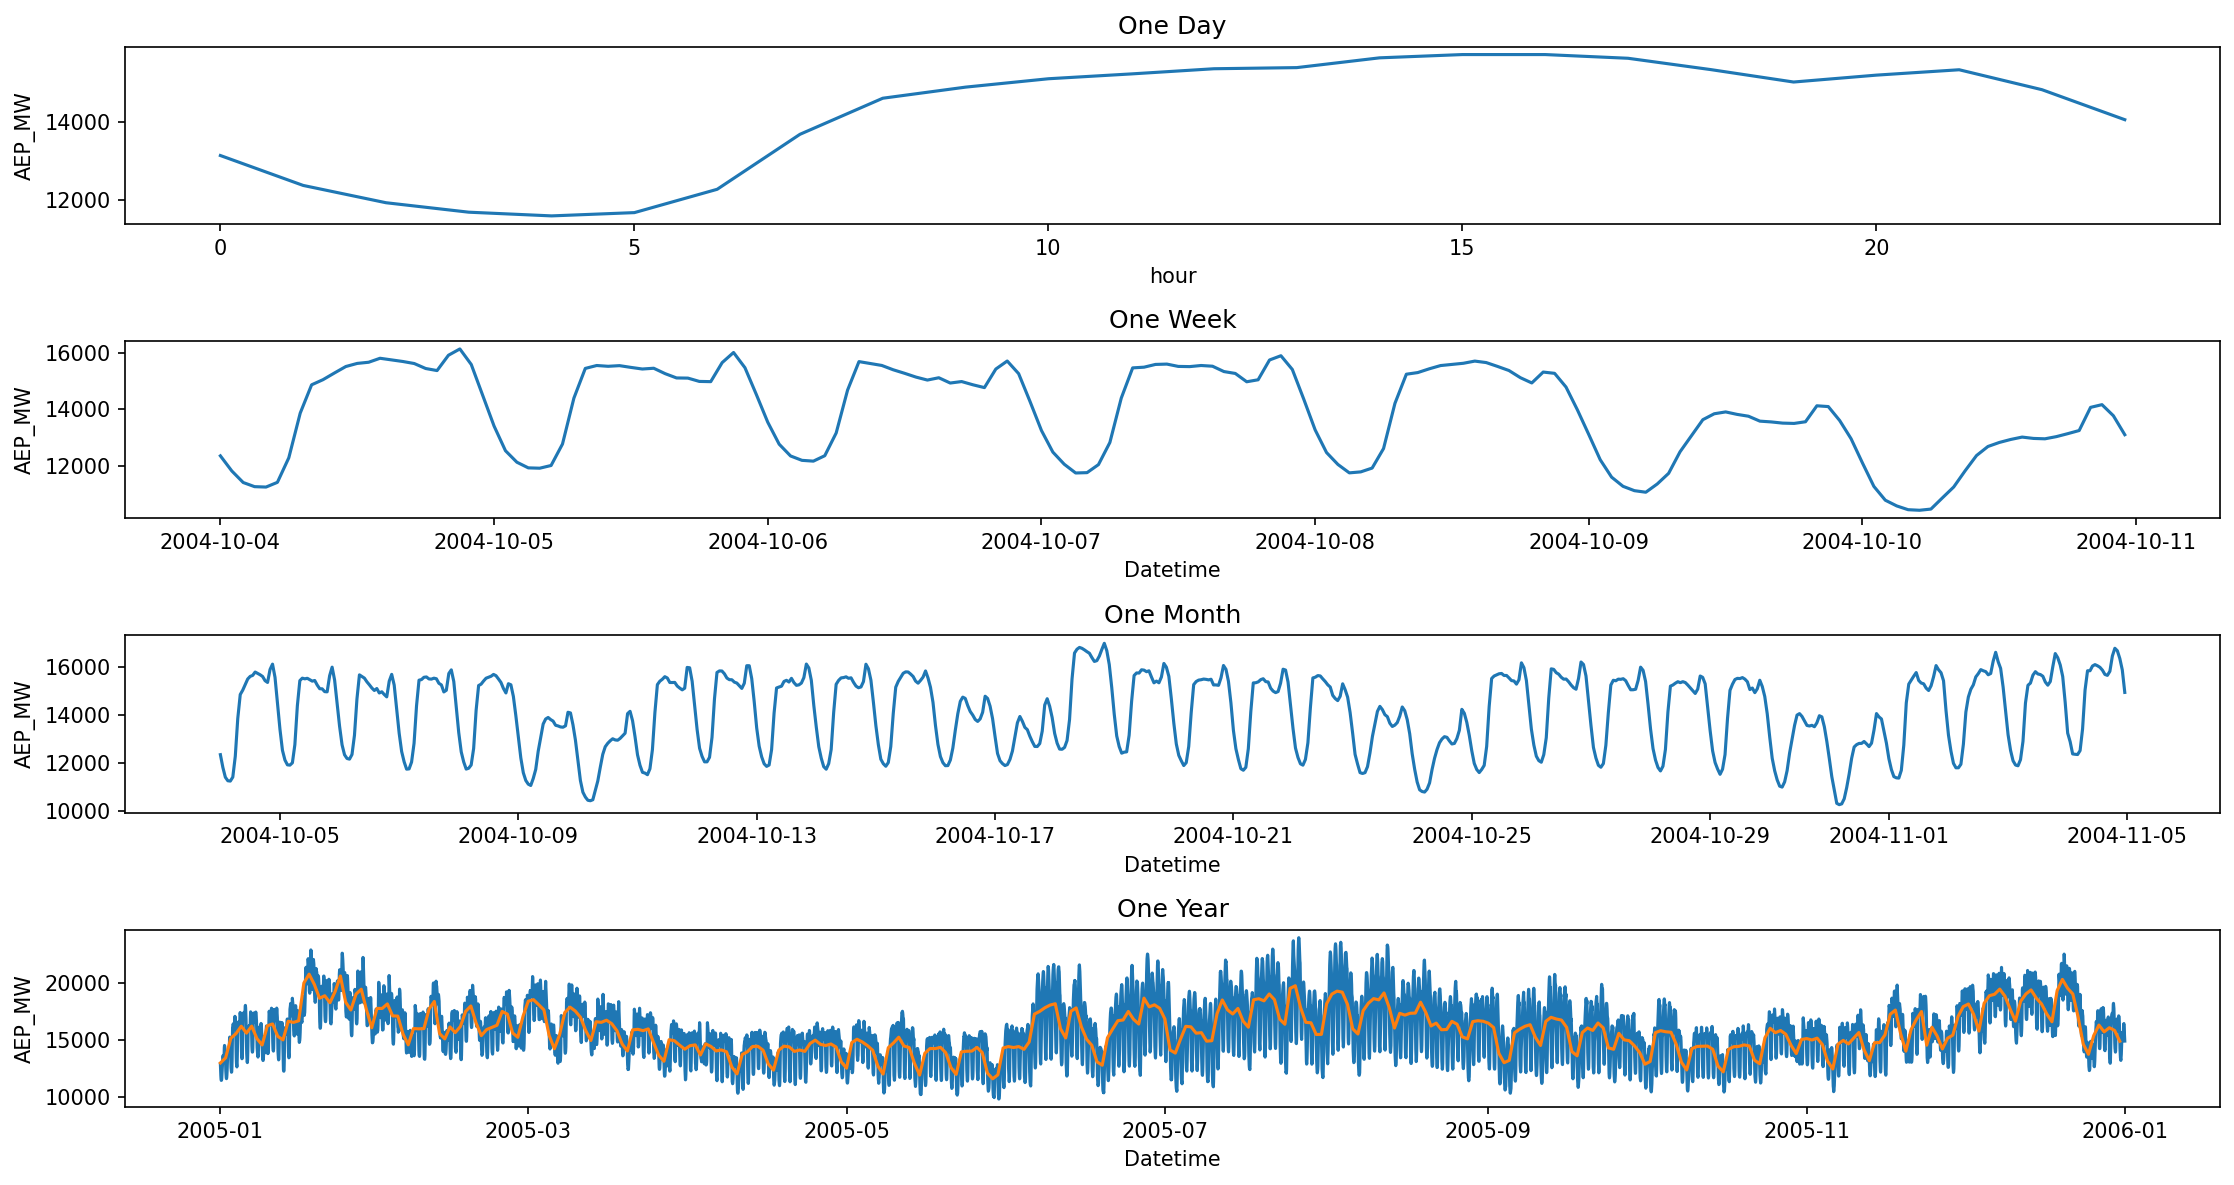

In [5]:
fig, ax = plt.subplots(4,1, figsize=(15, 8),dpi=150)


data_aep['date'] = pd.to_datetime(data_aep['date']) 
ax[0].title.set_text('One Day')
sns.lineplot(ax=ax[0], data=data_aep[:24], x="hour", y="AEP_MW")
ax[1].title.set_text('One Week')
sns.lineplot(ax=ax[1], data=data_aep[data_aep.date.between('2004-10-04','2004-10-10')], x="Datetime", y="AEP_MW")
ax[2].title.set_text('One Month')
sns.lineplot(ax=ax[2], data=data_aep[data_aep.date.between('2004-10-04','2004-11-04')], x="Datetime", y="AEP_MW")
ax[3].title.set_text('One Year')
sns.lineplot(ax=ax[3], data=data_aep[data_aep.date.between('2005-01-01','2005-12-31')], x="Datetime", y="AEP_MW")
data_aep_by_date = data_aep.groupby('date').mean()
sns.lineplot(ax=ax[3], data=data_aep_by_date['2005-01-01':'2005-12-31'], x="date", y="AEP_MW", palette='lime')
plt.tight_layout()

#Save as PDF
plt.savefig('img/day_week_month_year.pdf', dpi=300)

#### Plot Houry Energy Consumption Pattern for Every Year

<AxesSubplot:xlabel='hour', ylabel='AEP_MW'>

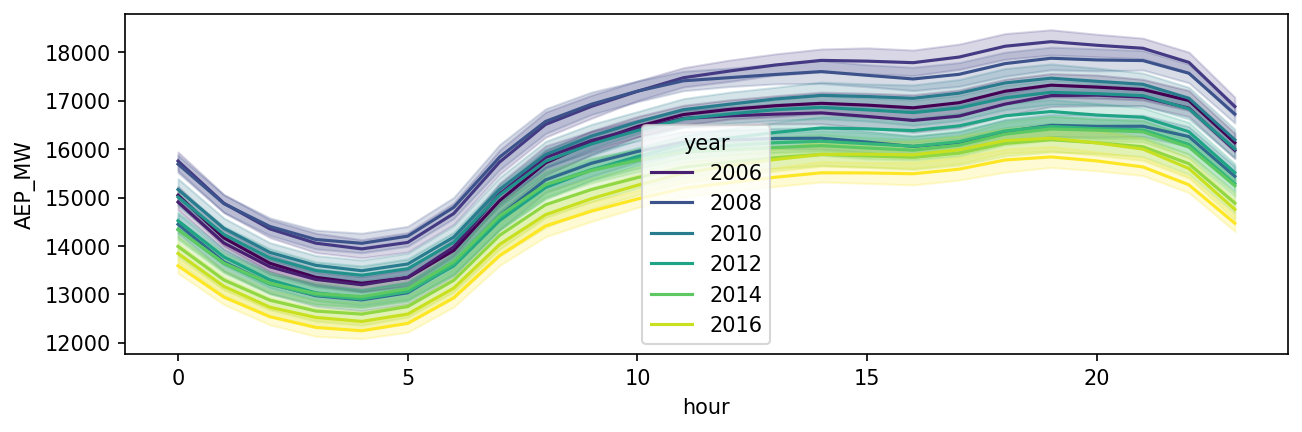

In [6]:
fig = plt.subplots(figsize=(10, 3),dpi=150)
sns.lineplot(data=data_aep[data_aep.date.between('2005-01-01','2017-12-31')], x="hour", y="AEP_MW", hue="year", palette='viridis')

##### Look at some more years to see yearly trends

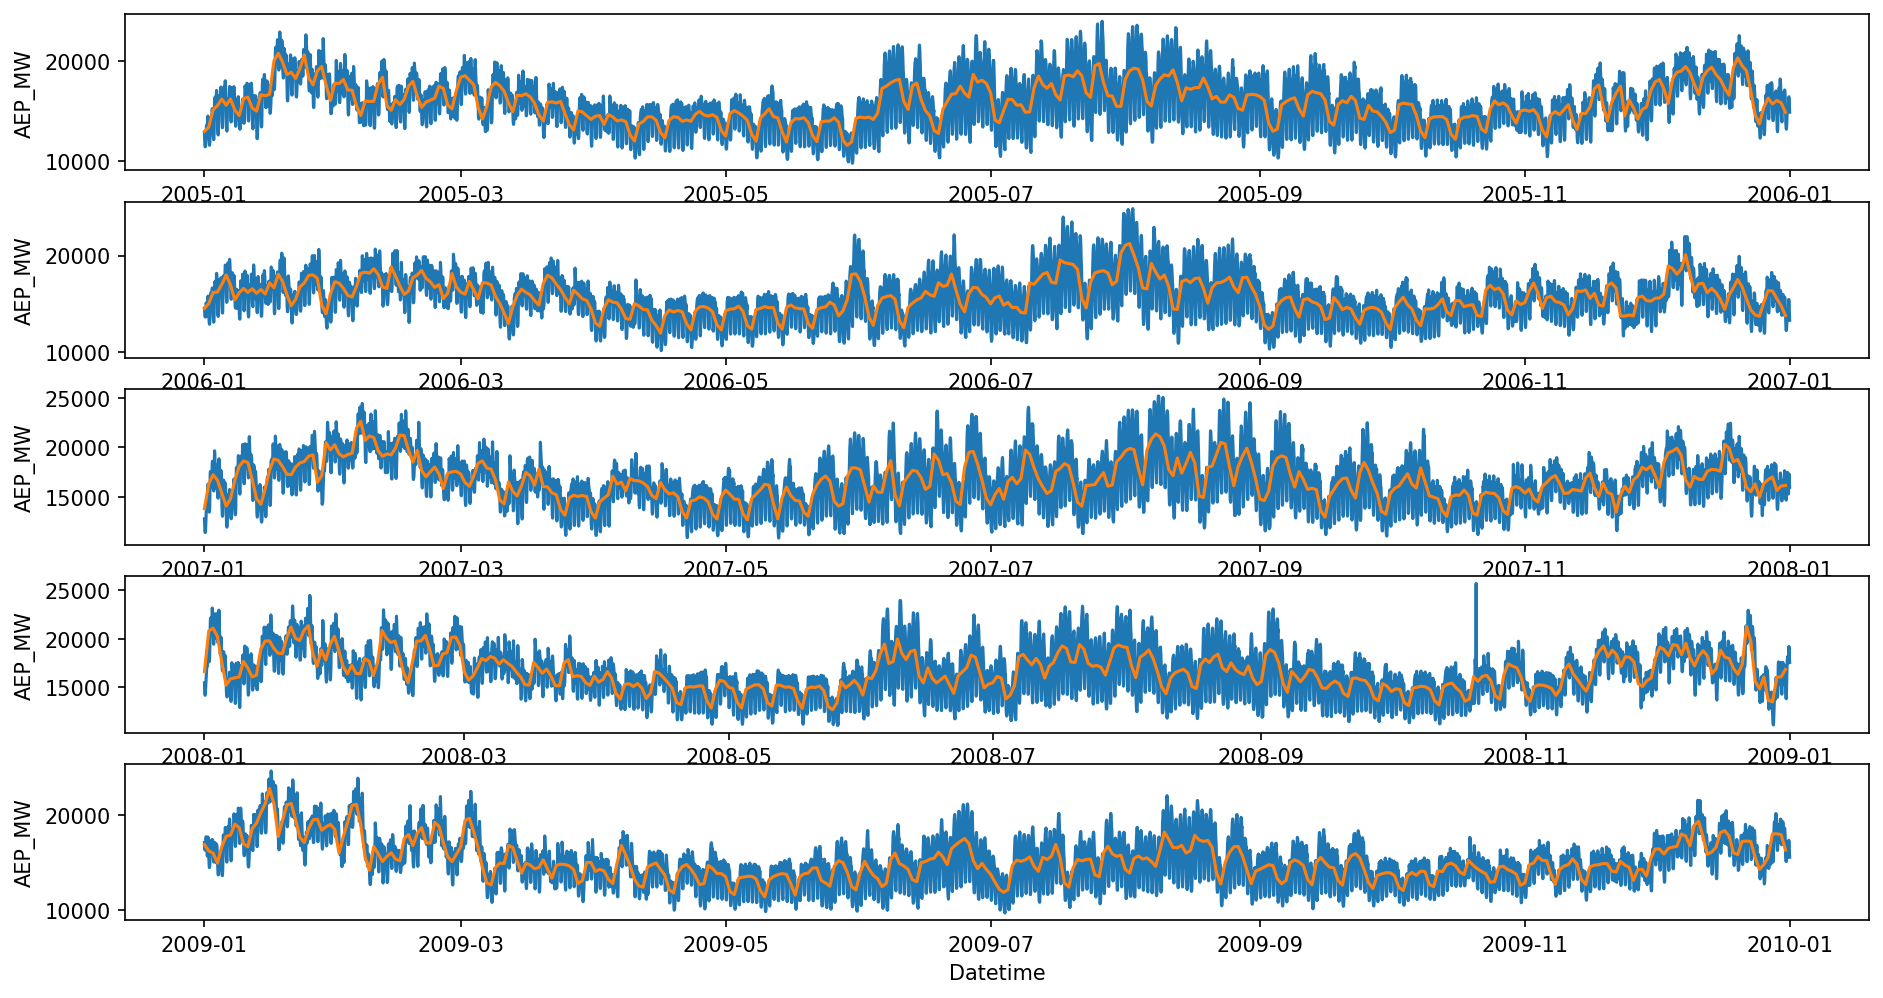

In [7]:
fig, ax = plt.subplots(5,1, figsize=(15, 8),dpi=150)

for i,yr in enumerate(['5','6','7','8','9']):
    sns.lineplot(ax=ax[i], data=data_aep[data_aep.date.between('200{}-01-01'.format(yr),'200{}-12-31'.format(yr))], x="Datetime", y="AEP_MW")
    tempyear = data_aep.groupby('date').mean()
    sns.lineplot(ax=ax[i], data=data_aep_by_date['200{}-01-01'.format(yr):'200{}-12-31'.format(yr)], x="date", y="AEP_MW", palette='lime')

#### Seasonal Analysis

In [8]:
# We only want full years
data_aep_full_years = data_aep[data_aep.date.between('2005-01-01','2017-12-31')]

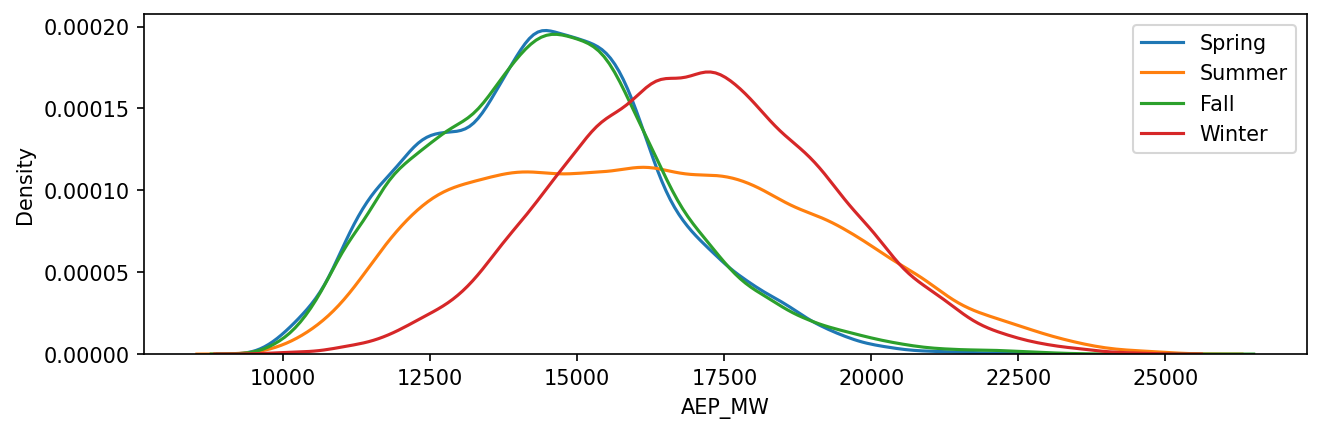

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10, 3),dpi=150)
sns.kdeplot(data_aep_full_years[data_aep_full_years['spring'] == 1]['AEP_MW'], label='Spring')#, shade = True)
sns.kdeplot(data_aep_full_years[data_aep_full_years['summer'] == 1]['AEP_MW'], label='Summer')#, shade = True)
sns.kdeplot(data_aep_full_years[data_aep_full_years['fall'] == 1]['AEP_MW'], label='Fall')#, shade = True)
sns.kdeplot(data_aep_full_years[data_aep_full_years['winter'] == 1]['AEP_MW'], label='Winter')#, shade = True)
ax.legend()

#### Cummulative Barplot of Seasons

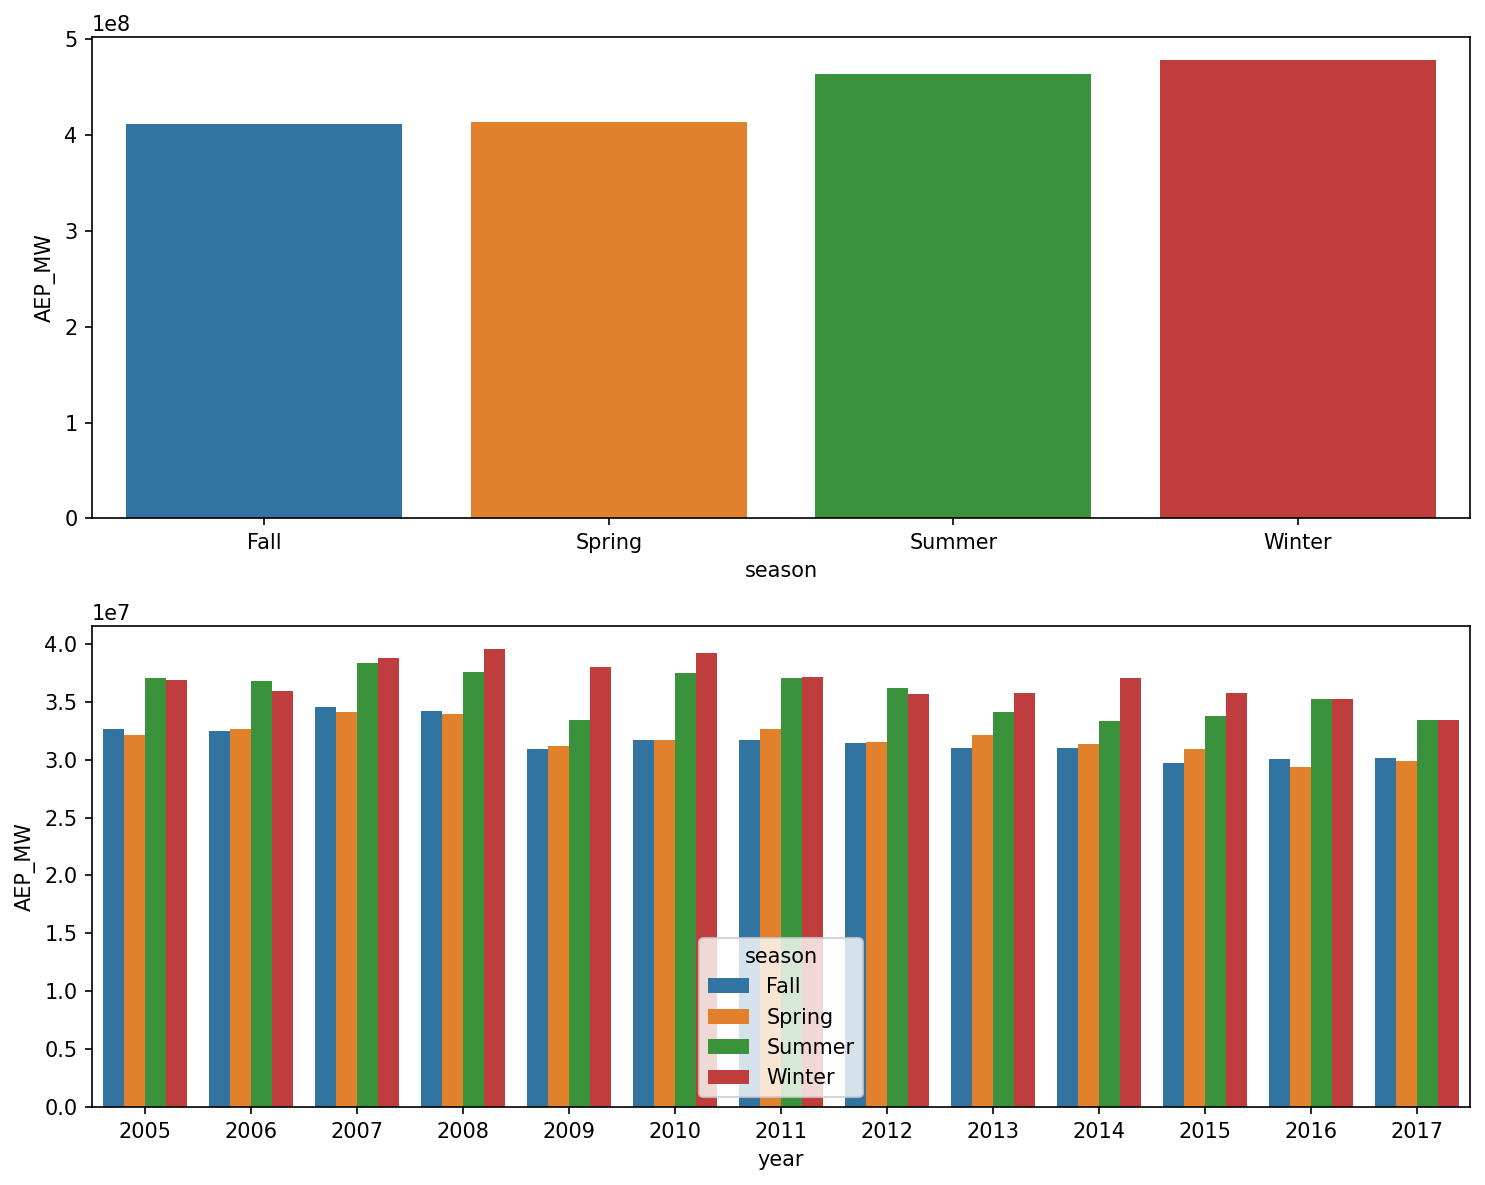

In [10]:
fig, ax = plt.subplots(2,1, figsize=(10, 8),dpi=150)

data_aep_seasons = data_aep_full_years[['season', 'AEP_MW']].groupby('season').sum().reset_index()
sns.barplot(ax = ax[0], x='season', y='AEP_MW', data=data_aep_seasons)
data_aep_grouped = data_aep_full_years[['year', 'season', 'AEP_MW']].groupby(['year', 'season']).sum().reset_index()
sns.barplot(ax = ax[1], data=data_aep_grouped, x='year', y='AEP_MW', hue='season')
plt.tight_layout()
#Save as PDF
plt.savefig('img/seasons_accumulated_sub.pdf', dpi=300)

#### Commulative Ranking of Individual Years

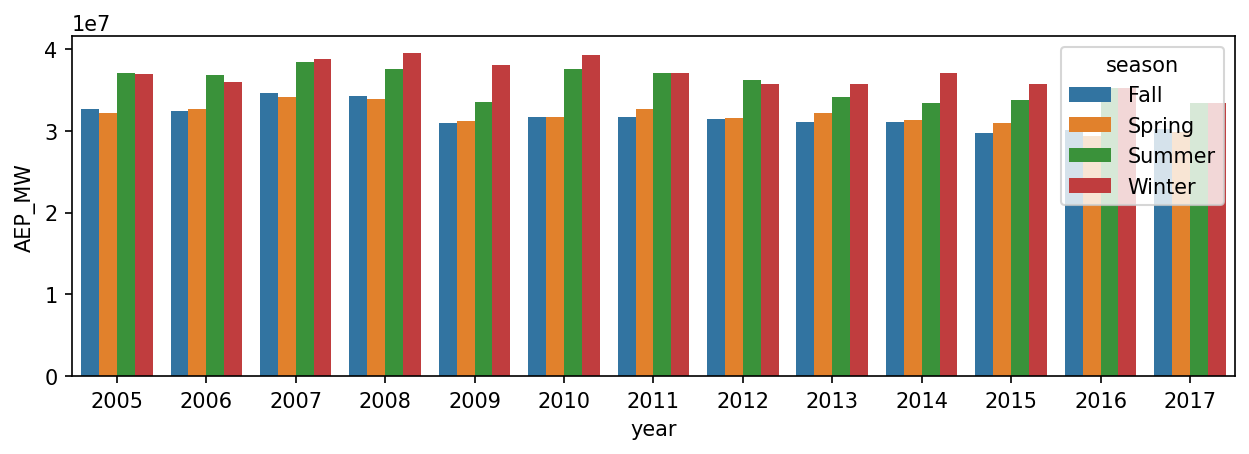

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10, 3),dpi=150)
data_aep_grouped = data_aep_full_years[['year', 'season', 'AEP_MW']].groupby(['year', 'season']).sum().reset_index()
sns.barplot(data=data_aep_grouped, x='year', y='AEP_MW', hue='season')
#Save as PDF
plt.savefig('img/seasons_per_year_accumulated.pdf', dpi=300)

#### Heatmap of Seasonal Energy Consumption for Individual Years

<AxesSubplot:xlabel='year', ylabel='season'>

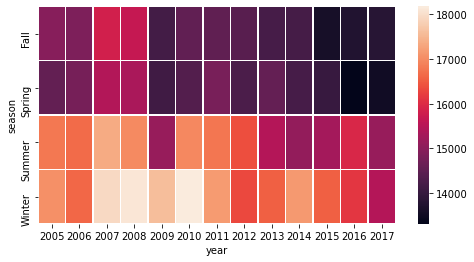

In [12]:
seasonYear = data_aep_full_years.groupby(by=['season','year']).mean()['AEP_MW'].unstack()
plt.figure(figsize=(8,4))
sns.heatmap(seasonYear, linewidths=0.5)

#### Plot Commulative Seasonal Energy Consumption for Every Hour

<AxesSubplot:xlabel='season', ylabel='AEP_MW'>

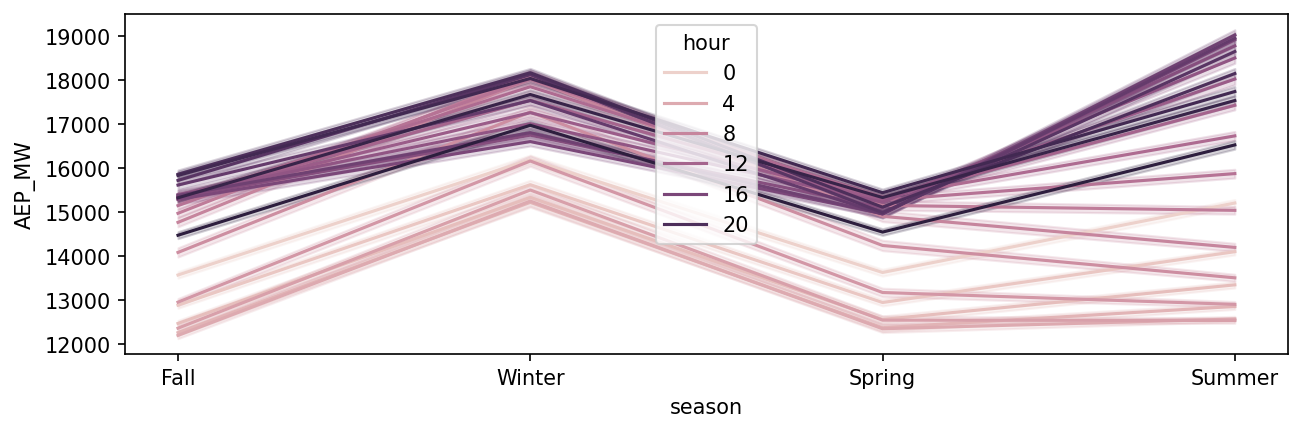

In [13]:
fig = plt.subplots(figsize=(10, 3),dpi=150)
sns.lineplot(data=data_aep, x="season", y="AEP_MW", hue="hour")

### Find Importance of Features with Linear Regression

#### Set Up Regression

In [14]:
factors = ['spring', 'summer', 'fall', 'winter', 'year', 'month', 'hour']
factorsX = data_aep[factors]
energy_consumption = data_aep['AEP_MW']

#### Scale Data

In [15]:
scaler = preprocessing.StandardScaler().fit(factorsX)
factors_scaled = scaler.transform(factorsX)

#### Lasso

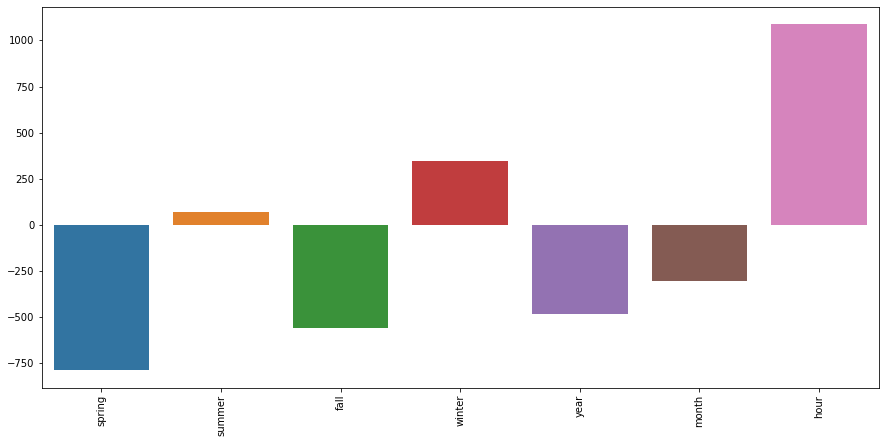

In [16]:
data_scaled_lasso = Lasso(alpha=1, fit_intercept=True).fit(factors_scaled, energy_consumption)
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.barplot(ax = ax, x=np.arange(len(factors)), y=data_scaled_lasso.coef_)
ax.set_xticks(np.arange(len(factors)))
ax.set_xticklabels(factors, rotation=90)
plt.show();

#### Ridge

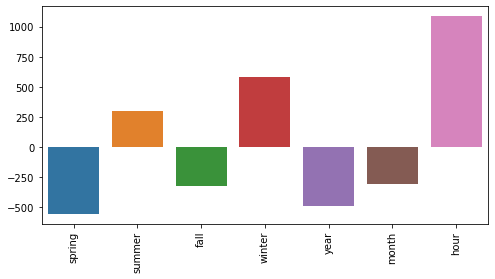

In [17]:
data_scaled_ridge = Ridge(alpha=100, fit_intercept=True).fit(factors_scaled, energy_consumption)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.barplot(ax = ax, x=np.arange(len(factors)), y=data_scaled_ridge.coef_)
ax.set_xticks(np.arange(len(factors)))
ax.set_xticklabels(factors, rotation=90)
#Save as PDF
plt.savefig('img/ridge_coefficients30.pdf', dpi=300)